In [114]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydot

In [115]:
graph = pydot.Dot(graph_type='graph')
sample_y =[ 
    [15,0,0],
    [15,0,0],
    [2,9,1],
    [3,5,0],
    [0,10,4],
    [0,10,1],
    [8,2,4],
    [7,3,1],
    [0,6,0],
    [0,9,0],
    [1,0,14],
    [0,0,20],
    [0,2,15],
    [1,3,14],
    [1,0,9],
    [0,0,5]
]
sample_x = [[1, 1, 'A'], [1, 2, 'A'], [2, 2, 'A'], [2, 1, 'A'], [1, 1, 'B'],
             [1, 2, 'B'], [2, 2, 'B'], [2, 1, 'B'], [1, 1, 'C'], [1, 2, 'C'],
             [2, 2, 'C'], [2, 1, 'C'], [1, 1, 'D'], [1, 2, 'D'], [2, 2, 'D'],
             [2, 1, 'D']]

In [116]:
X,Y = [],[]
for i,time_y in enumerate(sample_y):
    for pos,times in enumerate(time_y):
        y_entry = [0,0,0]
        y_entry[pos] = 1
        Y.extend([y_entry]*times)
        X.extend([sample_x[i]]*times)
    
for i, l in enumerate(X):
    for j, m in enumerate(X[i]):
        if X[i][j] == 'A':
            X[i][j] = 1
        elif X[i][j] == 'B':
            X[i][j] = 2
        elif X[i][j] == 'C':
            X[i][j] = 3
        elif X[i][j] == 'D':
            X[i][j] = 4

In [117]:
print(X)

[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [1, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 2, 1], [2, 1, 1], [2, 1, 1], [2, 1, 1], [2, 1, 1], [2, 1, 1], [2, 1, 1], [2, 1, 1], [2, 1, 1], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 1, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [1, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 1, 2], [2, 1, 2]

In [118]:
X = pd.DataFrame(X,columns=['X1','X2','X3'])
Y = pd.DataFrame(Y,columns=['Y1','Y2','Y3'])
X.shape, Y.shape

((200, 3), (200, 3))

In [119]:
# X = pd.get_dummies(X,prefix=['X3'])


In [120]:

clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
clf = clf.fit(X, Y)

In [121]:
y_predicted = clf.predict(X)
accuracy_score(Y,y_predicted)

0.855

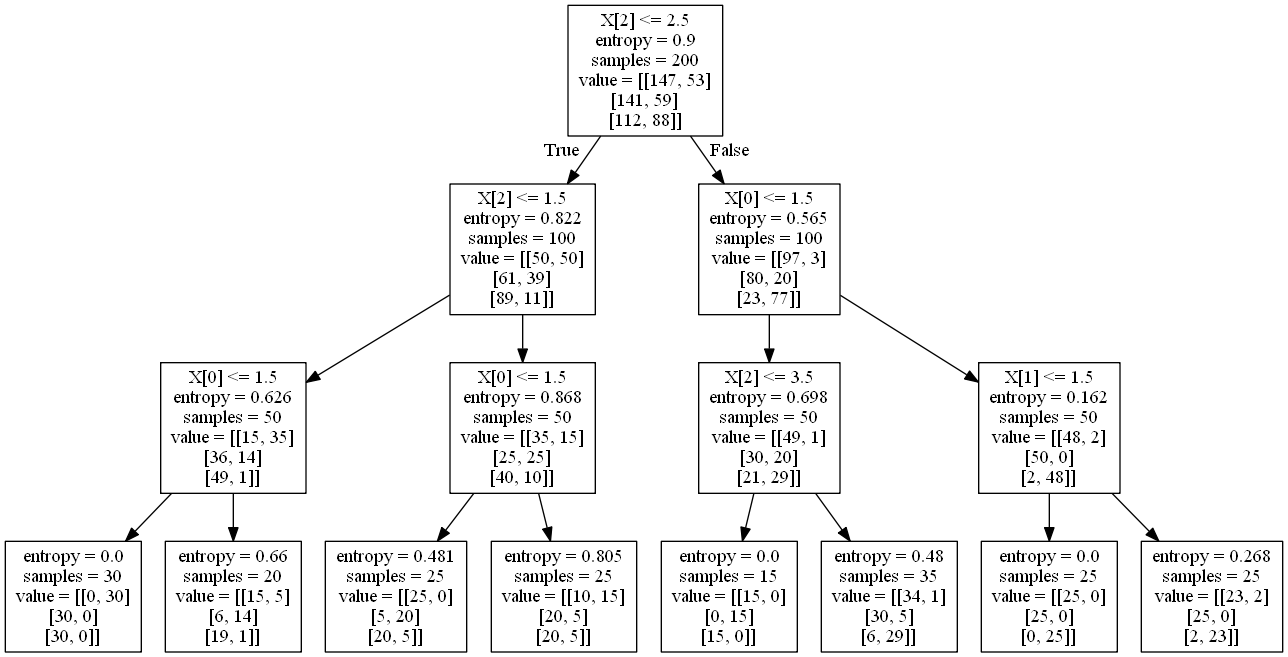

In [122]:
tree.export_graphviz(clf,out_file='dtc.dot')
(graph,) = pydot.graph_from_dot_file('dtc.dot')
graph.write_png('dytc.png')
from IPython.display import Image, display
plt = Image(graph.create_png())
display(plt)

In [101]:
import math

def entropy(p1, p2, p3):
    print(p1, p2, p3)
    try:
        x = -p1* math.log2(p1)
    except:
        x = 0
    try:
        y = -p2*math.log2(p2)
    except:
        y = 0
    try:
        z = -p3* math.log2(p3)
    except:
        z = 0
    return x + y+z
    

In [74]:
entropy(0.782, 0.629)

TypeError: entropy() missing 1 required positional argument: 'p3'

In [26]:
entropy(0.217, 0.333)

1.0065917428889657

In [28]:
entropy(0, 0.037)

0.17598424400422608

In [29]:
entropy(1, 0.25)

0.5

In [30]:
entropy(0, 0.7)

0.3602012209808308

In [31]:
entropy(0, 0.05)

0.21609640474436814

In [102]:
entropy(53/200, 59/200, 88/200)

0.265 0.295 0.44


1.5484276575533231

In [34]:
entropy(31/105, 40/105, 34/105)

1.5768079365232734

In [35]:
entropy(22/95, 19/95, 54/95)

1.4163604137806745

In [36]:
entropy(25/96, 26/96, 45/96)

1.528283055399574

In [37]:
entropy(28/104, 33/104, 43/104)

1.561975023827322

In [38]:
entropy(35/50, 14/50, 1/50)

0.9872986997371193

In [39]:
entropy(15/50, 25/50, 10/50)

1.4854752972273344

In [40]:
entropy(1/50, 15/50, 34/50)

1.0123142790419384

In [41]:
entropy(2/50, 5/50, 43/50)

0.7050756912421843

In [72]:
math.log10(2.71)

0.4329692908744057

In [78]:
??tree.DecisionTreeClassifier

In [79]:
from scipy.stats import entropy

In [93]:
entropy([X["X1"].sum()/200, X["X2"].sum()/200, X["X3"].sum()/200])

1.0668163724574575

In [91]:
len(X["X1"])

200

In [98]:
set(zip(X.columns[clf.tree_.feature], clf.tree_.threshold, clf.tree_.children_left, clf.tree_.children_right))


{('X1', 1.5, 3, 4),
 ('X1', 1.5, 6, 7),
 ('X1', 1.5, 9, 12),
 ('X2', -2.0, -1, -1),
 ('X2', 1.5, 13, 14),
 ('X3', 1.5, 2, 5),
 ('X3', 2.5, 1, 8),
 ('X3', 3.5, 10, 11)}

In [103]:
entropy(95/105, 10/105, 0)

0.9047619047619048 0.09523809523809523 0


0.4537163391869448

In [104]:
entropy(18/150, 45/150, 87/150)

0.12 0.3 0.58


1.3439645338316386

In [105]:
entropy(38/150, 34/150, 78/150)

0.25333333333333335 0.22666666666666666 0.52


1.477776322598393

In [106]:
entropy(52/150, 44/150, 54/150)

0.3466666666666667 0.29333333333333333 0.36


1.579473479294513

In [107]:
entropy(51/150, 54/150, 45/150)

0.34 0.36 0.3


1.5808786445478216

In [108]:
1.5484 - ((50/200)*0.98729 + (150/200)*1.3439)

0.29365249999999987

In [113]:
1.5484 - ((50/200)*0.7050 + (150/200)*1.58087)

0.18649749999999998

In [124]:
entropy(50/100, 39/100, 11/100)

0.5 0.39 0.11


1.380083751480983

In [129]:
entropy(36/100, 29/100, 35/100)

0.36 0.29 0.35


1.578619644737758

In [125]:
entropy(37/100, 19/100, 44/100)

0.37 0.19 0.44


1.5071023047373213

In [126]:
entropy(16/100, 40/100, 44/100)

0.16 0.4 0.44


1.4729350396193688

In [127]:
entropy(17/100, 30/100, 53/100)

0.17 0.3 0.53


1.441122487161116

In [128]:
entropy(3/100, 20/100, 77/100)

0.03 0.2 0.77


0.9064960594405433

In [130]:
1.5484 - ((100/200)*1.3800 + (100/200)*0.9064)

0.4052

In [134]:
1.5484 - ((100/200)*1.50071 + (100/200)*1.4729)

0.061595000000000066

In [138]:
entropy(8/9, 1/9, 0)

0.8888888888888888 0.1111111111111111 0


0.5032583347756457

In [139]:
entropy(2/11, 9/11, 0)

0.18181818181818182 0.8181818181818182 0


0.6840384356390417

In [141]:
1 -(9/20) * 0.5032 - (11/20) * 0.6840

0.39736